In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import numpy.random as rnd
import os

# to make this notebook's output stable across runs
seednumber = rnd.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [8]:
import pandas as pd
import numpy as np
from scipy.stats import kurtosis, skew, mode

datapath = "/Users/tuanle/DynamicPricing/Data/"

Dong_Da = pd.read_csv(datapath+"DongDa_1min_1month_04-3.csv")
Dong_Da.accept_rate = Dong_Da.accept_rate.shift(-1)
Dong_Da = Dong_Da.dropna(subset=["accept_rate"])
Dong_Da2 = Dong_Da.drop("requests", axis = 1)
Dong_Da2 = Dong_Da2.drop("district", axis = 1)
median = Dong_Da2["acceptorder"].median()
Dong_Da2.fillna(median, inplace = True)
df = pd.DataFrame(Dong_Da2)
foo = df.ix[(df['accept_rate']<1) & (df['acceptorder'] > df.acceptorder.median())]

# plt.plot(Dong_Da.average_waiting_time)
# plt.show()

#Check skewness of DongDa_1min (1month data)
# kurtosis(Dong_Da.weighted_waitingtime, axis=0, fisher = True, bias=True), skew(Dong_Da.weighted_waitingtime, axis=0, bias=True)
# Dong_Da.weighted_waitingtime.mean(), Dong_Da.weighted_waitingtime.median(), mode(Dong_Da['weighted_waitingtime'])

# # cols = {'accept_rate', 'online'}
# # AR = pd.DataFrame(columns = cols, index = range(len(df2)))

# # for i in range(len(df2)-1):
# #      for j in range(len(df)-1):
# #         if df2.time_window[i] == df.timewindow[j]:
# #             AR.loc[i].online = df2.online[i]
# #             AR.loc[i].accept_rate = df.timewindow[j]  





(array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1146b2cf8>,
         <matplotlib.axes._subplots.AxesSubplot object at 0x115846978>]], dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117e3b588>,
         <matplotlib.axes._subplots.AxesSubplot object at 0x117f0d198>]], dtype=object))

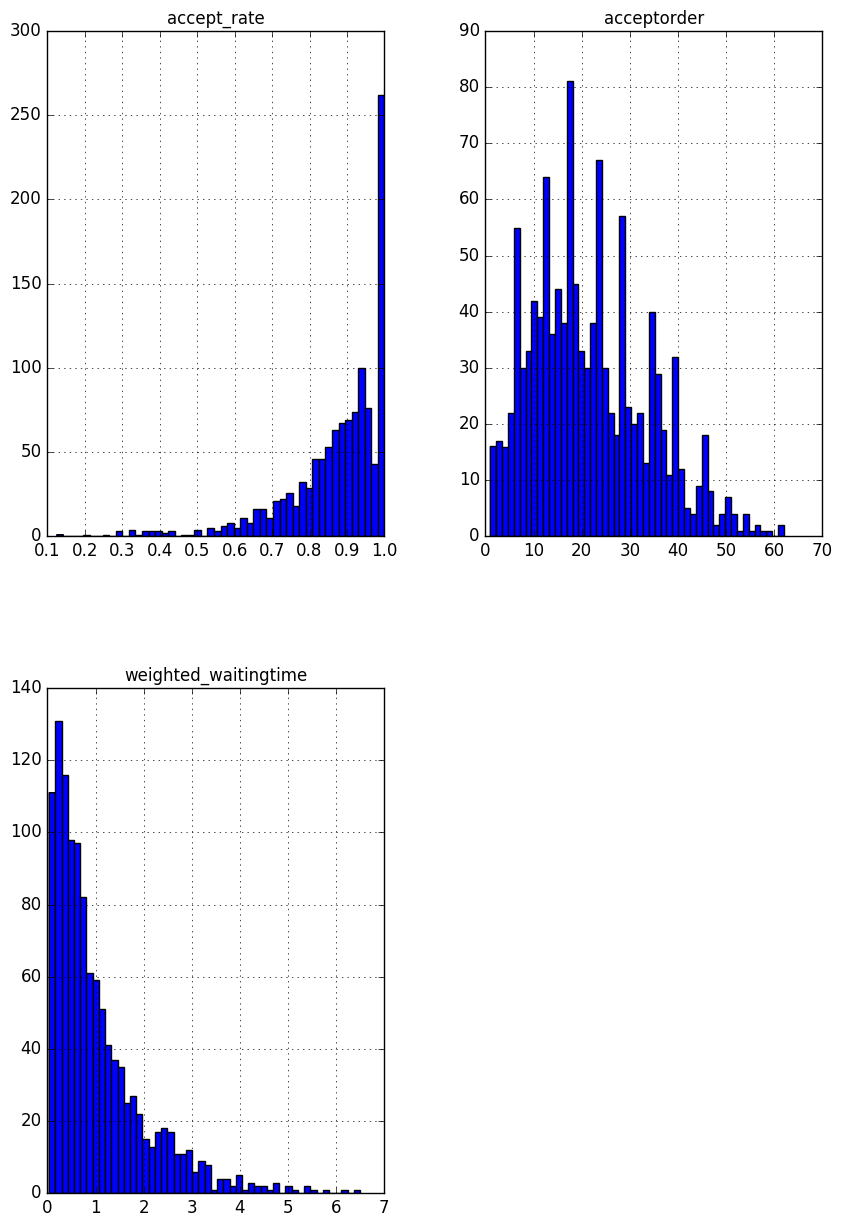

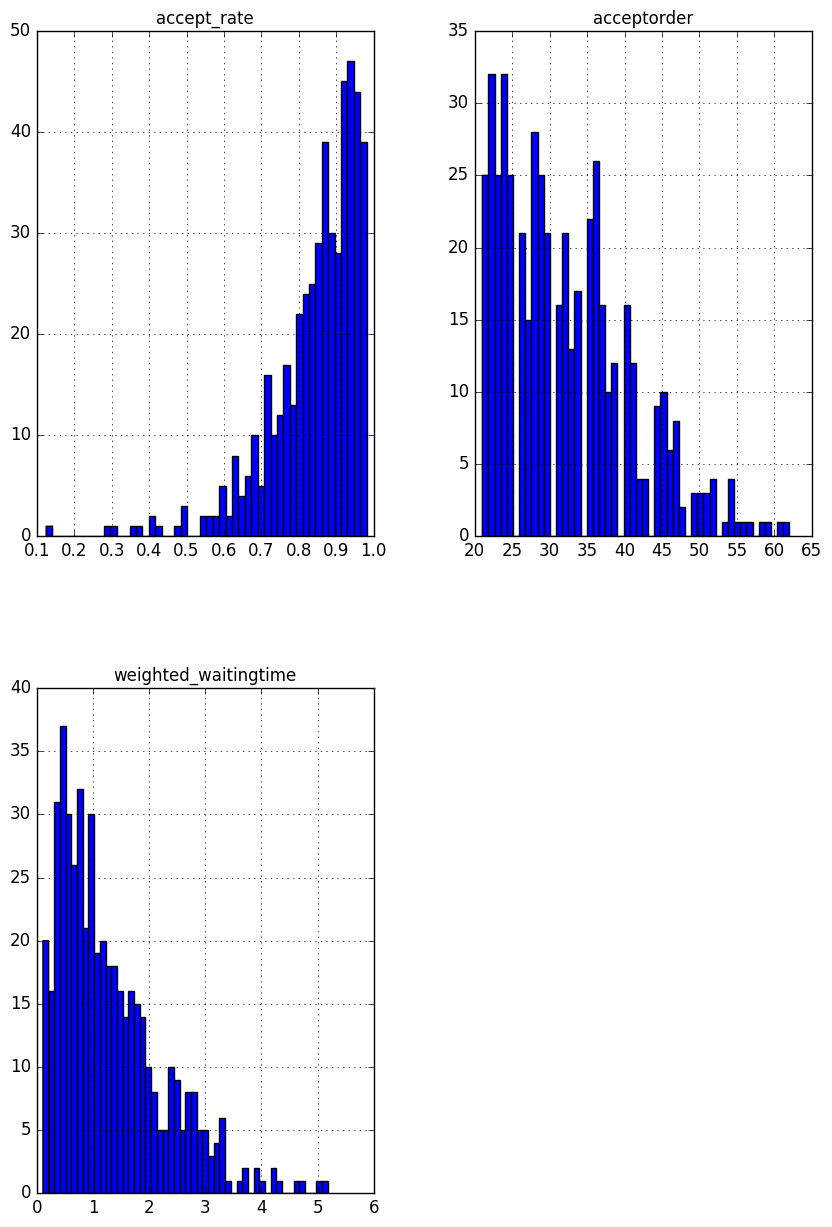

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(10,15)), foo.hist(bins=50, figsize=(10,15))


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.3, random_state=seednumber)
Xtrain = train_set['weighted_waitingtime'].reshape(-1,1)
Ytrain = train_set['accept_rate'].reshape(-1,1)

Xtest = test_set['weighted_waitingtime'].reshape(-1,1)
Ytest = test_set['accept_rate'].reshape(-1,1)

Ytest1 = test_set.accept_rate
Ytest1.describe(include=all)



count    351.000000
mean       0.868847
std        0.136683
min        0.125000
25%        0.814384
50%        0.900000
75%        0.961538
max        1.000000
Name: accept_rate, dtype: float64

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

train_set2, test_set2 = train_test_split(foo, test_size=0.3, random_state=seednumber)
Xtrain2 = train_set2['weighted_waitingtime'].reshape(-1,1)
Ytrain2 = train_set2['accept_rate'].reshape(-1,1)

Xtest2 = test_set2['weighted_waitingtime'].reshape(-1,1)
Ytest2 = test_set2['accept_rate'].reshape(-1,1)

Ytest2 = test_set2.accept_rate
Ytest2.describe(include=all)

count    150.000000
mean       0.841838
std        0.119099
min        0.347826
25%        0.786094
50%        0.875000
75%        0.934946
max        0.976190
Name: accept_rate, dtype: float64

# Linear Regression - ML model

In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
result = model.fit(Xtrain, Ytrain)


In [38]:
from sklearn.linear_model import LinearRegression

model2 = LinearRegression()
result = model2.fit(Xtrain2, Ytrain2)


In [18]:
#Prediction on the test set for original dataset
Accept_rate_prediction = model.predict(Xtest) 
print("Predictions:\t", Accept_rate_prediction)

#Prediction on the WHOLE training set for original dataset
Accept_rate_train1 = model.predict(Xtrain)

#Prediction on the test set for new dataset foo (eliminating datas that are considered outliers)
# Accept_rate_prediction2 = model2.predict(Xtest2)
# print("Predictions:\t", Accept_rate_prediction2)

#Prediction on the WHOLE training set for new dataset foo (eliminating datas that are considered outliers)
# Accept_rate_train2 = model2.predict(Xtrain2)





Predictions:	 [[ 0.91119113]
 [ 0.91012155]
 [ 0.85477521]
 [ 0.92958998]
 [ 0.95316367]
 [ 0.91608471]
 [ 0.93727195]
 [ 0.95195058]
 [ 0.88238241]
 [ 0.95838231]
 [ 0.80835774]
 [ 0.91008003]
 [ 0.94845498]
 [ 0.68324431]
 [ 0.72649542]
 [ 0.92300254]
 [ 0.77901559]
 [ 0.91009136]
 [ 0.93711453]
 [ 0.95200042]
 [ 0.86414489]
 [ 0.94175899]
 [ 0.837321  ]
 [ 0.95442451]
 [ 0.94988735]
 [ 0.85157838]
 [ 0.79537273]
 [ 0.94831012]
 [ 0.6738883 ]
 [ 0.78429387]
 [ 0.92699537]
 [ 0.93198906]
 [ 0.90100589]
 [ 0.85725153]
 [ 0.85511118]
 [ 0.95380672]
 [ 0.82283333]
 [ 0.55162114]
 [ 0.81578667]
 [ 0.94288825]
 [ 0.94473404]
 [ 0.88477636]
 [ 0.81223542]
 [ 0.7807784 ]
 [ 0.94079313]
 [ 0.64325617]
 [ 0.85805153]
 [ 0.94795072]
 [ 0.95490464]
 [ 0.81246196]
 [ 0.92843723]
 [ 0.8468329 ]
 [ 0.93779694]
 [ 0.82865821]
 [ 0.95718147]
 [ 0.93202354]
 [ 0.93042928]
 [ 0.74239063]
 [ 0.74090426]
 [ 0.88956933]
 [ 0.91251252]
 [ 0.9113871 ]
 [ 0.95471075]
 [ 0.94466093]
 [ 0.85035054]
 [ 0.816892

Saving figure average_waiting_time vs_acceptance_rate


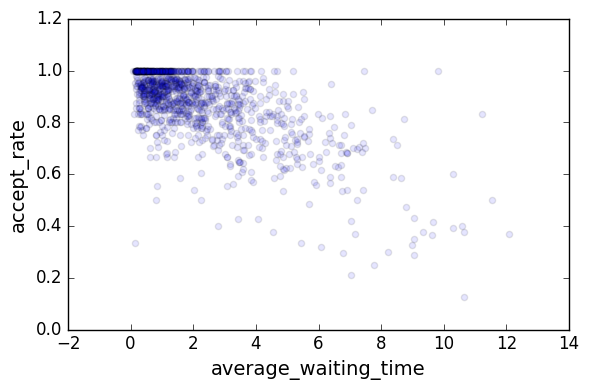

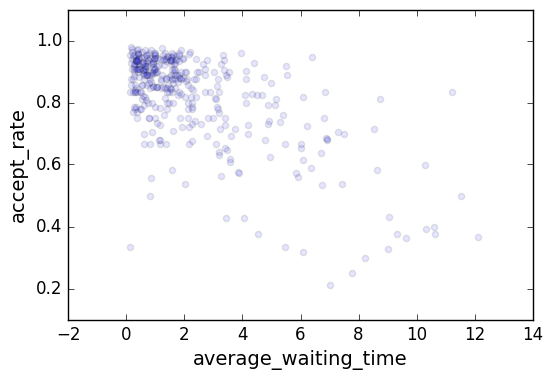

In [50]:
Dong_Da2.plot(kind="scatter", x="average_waiting_time", y="accept_rate", alpha=0.1),
save_fig("average_waiting_time vs_acceptance_rate"),
foo.plot(kind="scatter", x="average_waiting_time", y="accept_rate", alpha=0.1)


# Mean Squared Error & Mean Absolute Error

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

lin_mse = mean_squared_error(Ytest, Accept_rate_prediction)
lin_rmse = np.sqrt(lin_mse) #taking square root of MSE converts the units back to the original units of the output variable

lin_mae = mean_absolute_error(Ytest, Accept_rate_prediction)
print("Mean Square Error:\t",lin_rmse)
print("Mean Absolute Error:\t", lin_mae)


r_squared = r2_score(Ytest, Accept_rate_prediction) #built-in formula for R^2 
print("R^2:\t", r_squared) 

adjusted_Rsquared = 1 - (1-r_squared)*(len(Xtest)-1)/(len(Xtest)-1-1) #formula for adjusted R^2 by theory
print("Adjusted R^2:\t", adjusted_Rsquared) #correct the error when adding more and more independent variables to the linear regression model

lin_mse = mean_squared_error(Ytrain, Accept_rate_train1)
lin_rmse = np.sqrt(lin_mse)
print("Mean Squred Error_train:\t", lin_rmse)


Mean Square Error:	 0.109455269778
Mean Absolute Error:	 0.0783153633367
R^2:	 0.356893469732
Adjusted R^2:	 0.355050757611
Mean Squred Error_train:	 0.101163677747


In [52]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

lin_mse2 = mean_squared_error(Ytest2, Accept_rate_prediction2)
lin_rmse2 = np.sqrt(lin_mse2) #taking square root of MSE converts the units back to the original units of the output variable

lin_mae2 = mean_absolute_error(Ytest2, Accept_rate_prediction2)
print("Mean Square Error:\t",lin_rmse2)
print("Mean Absolute Error:\t", lin_mae2)


r_squared2 = r2_score(Ytest2, Accept_rate_prediction2) #built-in formula for R^2 
print("R^2:\t", r_squared2) 

adjusted_Rsquared2 = 1 - (1-r_squared2)*(len(Xtest2)-1)/(len(Xtest2)-1-1) #formula for adjusted R^2 by theory
print("Adjusted R^2:\t", adjusted_Rsquared2) #correct the error when adding more and more independent variables to the linear regression model

lin_mse2 = mean_squared_error(Ytrain2, Accept_rate_train2)
lin_rmse2 = np.sqrt(lin_mse2)
print("Mean Squred Error_train:\t", lin_rmse2)

Mean Square Error:	 0.103964543891
Mean Absolute Error:	 0.0799147139362
R^2:	 0.423813386808
Adjusted R^2:	 0.418527271091
Mean Squred Error_train:	 0.114594094813


Comment: R^2 and Adjusted R^2 are nearly the same (0.423 vs 0.418). This explains the acceptance rate is only explained roughly 50% by the independent variable average waiting time

# Measure Correlation Coefficients between acceptance rate against other variables

In [67]:
corr_matrix = Dong_Da2.corr()
corr_matrix2 = foo.corr()
corr_matrix["accept_rate"].sort_values(ascending=False), corr_matrix2["accept_rate"].sort_values(ascending=False)




(accept_rate             1.000000
 acceptorder            -0.084540
 average_waiting_time   -0.668629
 Name: accept_rate, dtype: float64, accept_rate             1.000000
 acceptorder             0.209843
 average_waiting_time   -0.647740
 Name: accept_rate, dtype: float64)

# Correlation Testing between two vectors

In [95]:
from scipy.stats.stats import pearsonr 
a = df3_update.reshape(-1,1).transpose()
b = DBR.reshape(-1,1)
# print pearsonr(a,b)


array([[ 1.        ,  1.        ,  0.82352941,  0.89473684,  0.88888889,
         0.95238095,  0.91044776,  0.8974359 ,  0.8627451 ,  0.79591837,
         0.9       ,  1.        ,  1.        ,  1.        ,  0.88888889,
         0.93939394,  0.88      ,  0.89795918,  0.81818182,  0.97826087,
         0.94594595,  0.92727273,  0.94117647,  0.90384615,  0.96551724,
         1.        ,  1.        ,  0.96296296,  0.86666667,  1.        ,
         1.        ,  1.        ,  1.        ,  0.9375    ,  1.        ,
         1.        ,  0.84615385,  1.        ,  1.        ,  0.8       ,
         1.        ,  0.84615385,  1.        ,  1.        ,  0.97368421,
         0.95121951,  1.        ,  0.95454545,  0.97222222,  0.95      ,
         0.7826087 ,  0.9375    ,  1.        ,  0.88888889,  1.        ,
         0.9787234 ,  1.        ,  0.77777778,  0.85714286,  0.86206897,
         0.92592593,  0.96296296,  0.92307692,  0.97142857,  0.95238095,
         0.86206897,  1.        ,  0.86956522,  1. 

# Save the model into disk and load it with given test set (Xtest, Ytest)

In [76]:
from sklearn.externals import joblib
filename = 'my_model.sav'
joblib.dump(model, filename)

# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(Xtest, Ytest) #R^2 result
print(result)


0.490341024599
